# **THE SPARKS FOUNDATION**
# Data Science & Business Analytics Internship
# By **Kamran khan**
# TASK-6: Create the Decision Tree classifier and visualize it graphically.
##  The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
import seaborn as sns

plt.style.use("seaborn-whitegrid")

### Reading Dataset 

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Deleting unnecessary columns

In [4]:
del data["Id"]

### Displaying the columns of the dataset

In [5]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Info of the dataset

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Checking Some Statistical Summary of the Dataset

In [25]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Checking the null values in the dataset

In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Counting the Number of groups and its Observation in the Species Columns

<AxesSubplot:>

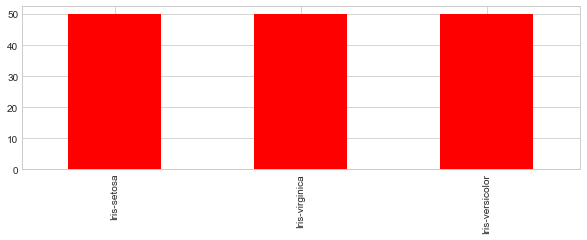

In [9]:
data.Species.value_counts().plot(kind ="bar", color="red", figsize= (10,3))

### Displaying the Correlation between the features

<AxesSubplot:>

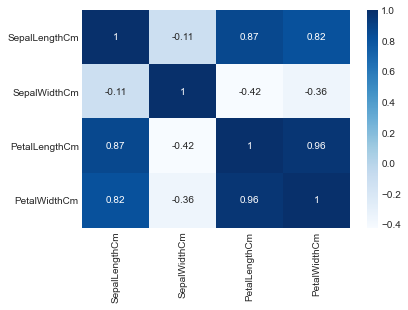

In [11]:
sns.heatmap(data.corr(), annot =True, cmap="Blues")

### Encoding the Object feature

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder =LabelEncoder()

data.Species = encoder.fit_transform(data.Species)
data.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

### Creating feature and target arrays

In [13]:
X = data.drop("Species", axis =1).values
y = data.Species.values

### Spliting The dataset into Train, Test, Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,
                                                    test_size=0.3,
                                                    random_state=42)

### Training Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# Fitting a Model
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Making Predictions

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

### Checking the Score of the model

In [17]:
model.score(X_test, y_test)*100

100.0

### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

### Ploting Confusion Matrix

<AxesSubplot:>

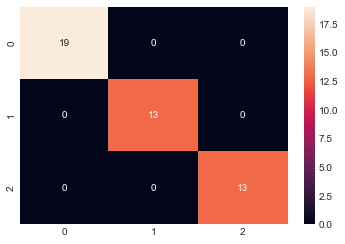

In [19]:
sns.heatmap(cm, annot  =True)

In [20]:
features = list(data.columns[:4])
target = ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']

### Visualization of Decision Tree 

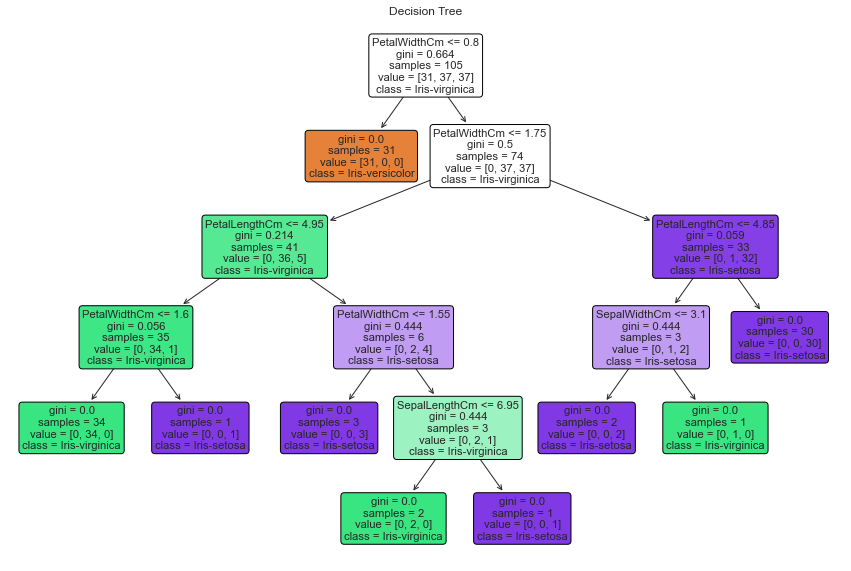

In [21]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names=features,
               class_names=target,
               rounded = True,
               filled=True)
plt.title("Decision Tree")
plt.show()

In [22]:
from sklearn import tree
import graphviz

dot_data=tree.export_graphviz(model,
                              feature_names=features,
                              class_names=target, 
                              rounded = True,
                              filled=True )

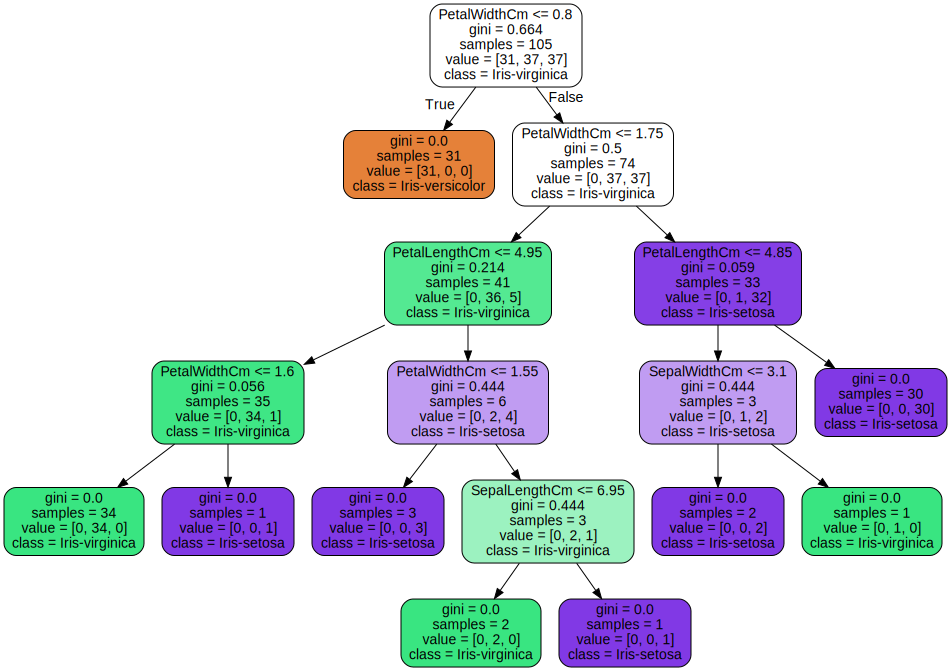

In [23]:
graph  =graphviz.Source(dot_data)
graph